In [1]:
import pandas as pd
import numpy as np
import numpy as np
import matplotlib.pyplot as plt

In [11]:
simbad = pd.read_csv('/home/shared/splus_gaia/data/h-alpha-selection-marina/MC/halpha_emitters_mc_simbad_and_all.csv')

/tmp/ipykernel_662951/1801433604.py:1: DtypeWarning: Columns (41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  simbad = pd.read_csv('/home/shared/splus_gaia/data/h-alpha-selection-marina/MC/halpha_emitters_mc_simbad_and_all.csv')


In [8]:
mu = pd.read_csv('/home/shared/splus_gaia/data/h-alpha-selection-marina/mu_mc.csv')

In [9]:
mu

,id,mu_max_u,mu_max_g,mu_max_r,mu_max_i,mu_max_z,mu_max_j0378,mu_max_j0395,mu_max_j0410,mu_max_j0430,mu_max_j0515,mu_max_j0660,mu_max_j0861,upload_ra,upload_dec
0,i06MC007700926,15.619334,14.545178,14.338179,14.216638,13.875207,15.555148,15.645620,15.145187,15.050568,14.265625,13.946580,13.265106,36.309193,-71.384070
1,i06MC007700E49,15.817666,14.944682,14.373963,14.253780,13.954336,15.671957,15.799978,15.410427,15.289393,14.629168,13.910003,13.837292,37.636734,-71.191864
2,i06MC007700E6B,16.956954,15.192803,14.347380,14.282254,13.879864,16.952130,16.703211,16.162324,15.838829,14.940897,13.997342,13.670553,38.089120,-71.189514
3,i06MC007700GH8,15.246663,14.390865,14.350745,14.259834,13.922172,15.113919,15.187611,14.858163,14.714195,14.153685,13.957500,13.322382,38.173390,-71.118126
4,i06MC007700H6I,14.739457,14.099203,14.360100,14.213717,13.891608,14.494898,14.585506,14.315061,14.177756,13.667689,13.929273,13.178397,37.326122,-71.092990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30270,i06MC009505HL7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.770546,-72.257256
30271,i06MC009505HMP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.547304,-72.256615
30272,i06MC009505HO9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.914953,-72.262140
30273,i06MC009505I20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.788555,-72.257900


In [13]:
simbad.drop_duplicates(subset=['id'], inplace=True)

In [14]:
len(simbad)

65054

In [5]:
simbad.groupby('main_type')['id'].count()

main_type
**                     47
AGB*                    6
AGB*_Candidate          2
AGN                     8
AGN_Candidate          17
                       ..
blue                    1
delSctV*                6
post-AGB*              12
post-AGB*_Candidate    89
smmRad                  1
Name: id, Length: 106, dtype: int64

In [6]:
emline = simbad[simbad['main_type'].str.contains('Em', na=False)]

In [7]:
emline.groupby('main_type')['id'].count()

main_type
EmLine*      1806
EmObj          14
EmissionG      49
Name: id, dtype: int64

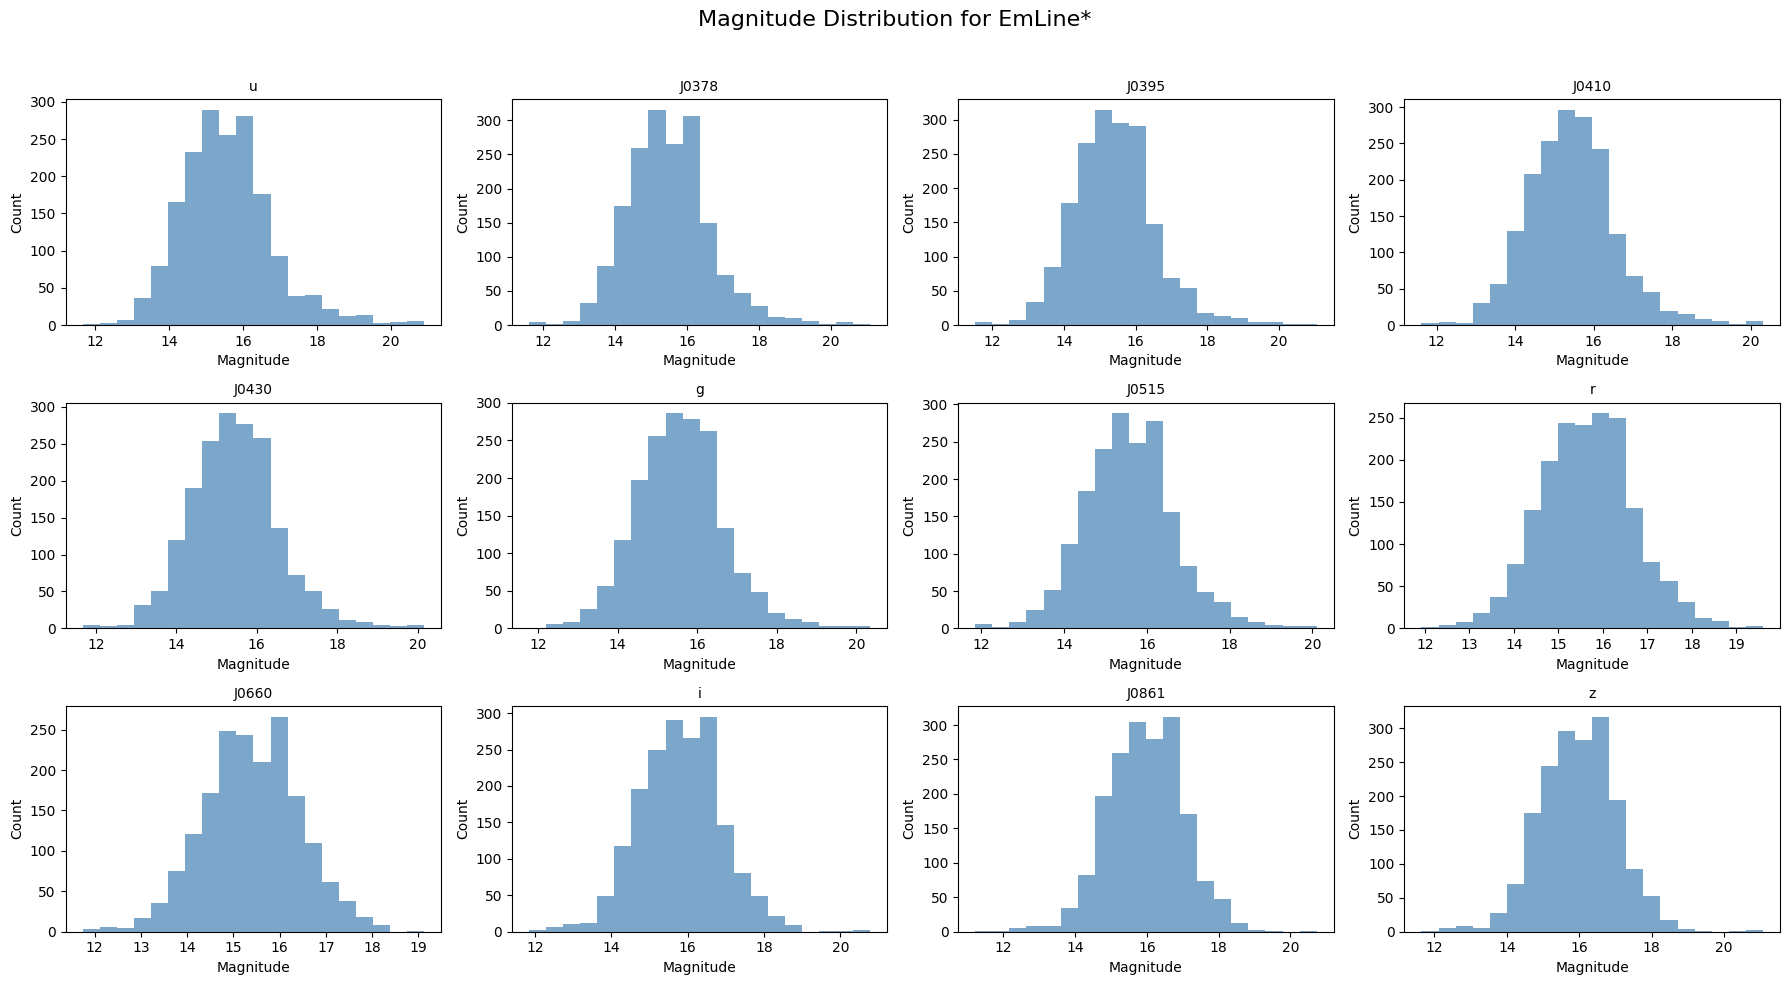

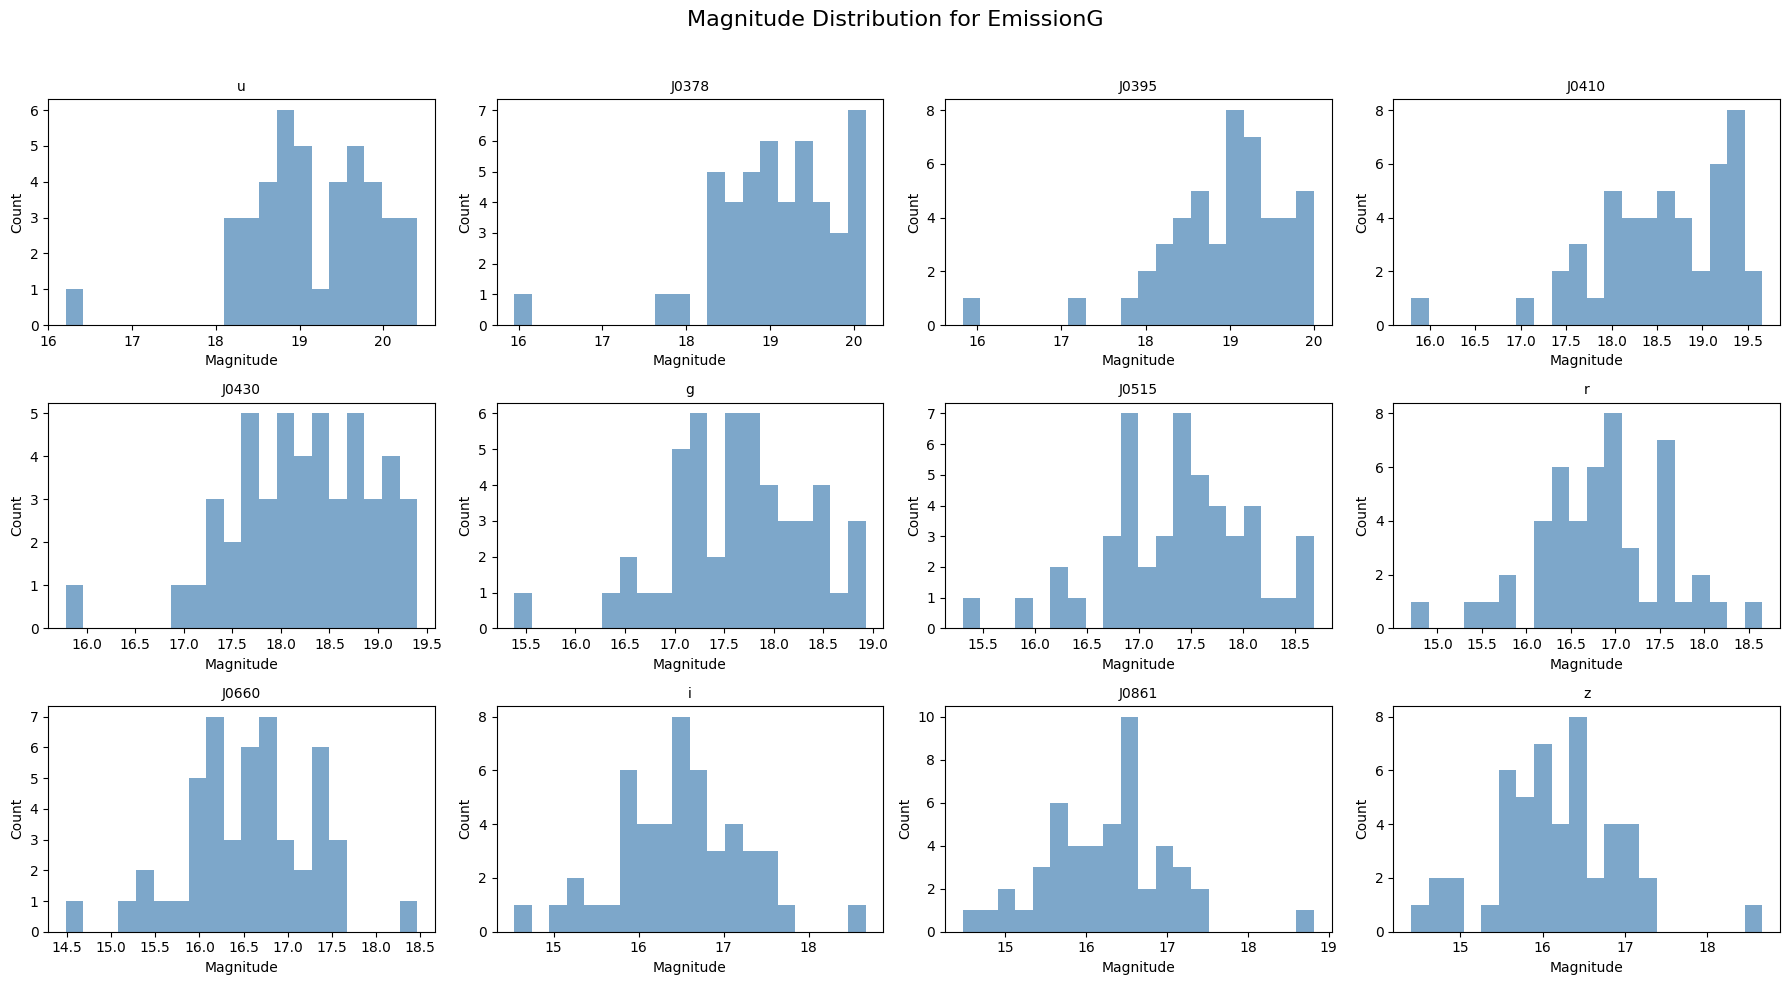

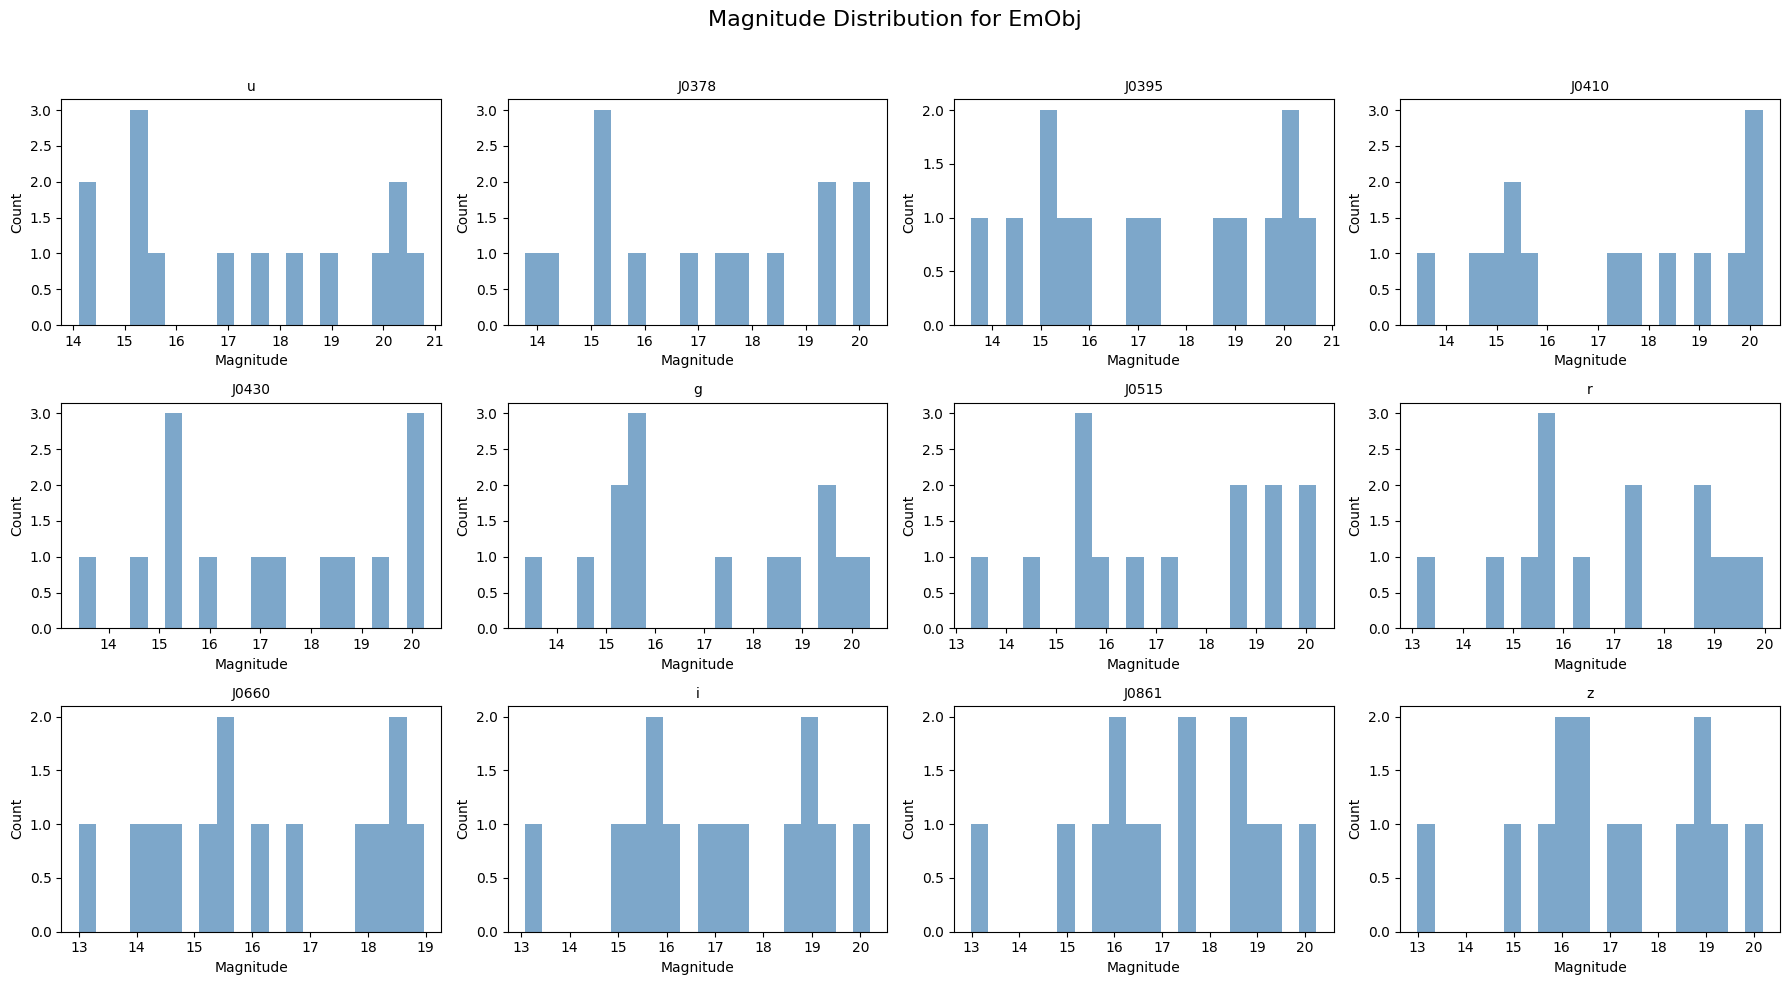

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

bands = ['u', 'J0378', 'J0395', 'J0410', 'J0430', 'g', 'J0515', 'r', 'J0660', 'i', 'J0861', 'z']
types = emline['main_type'].unique()

# Defina número de colunas e linhas no grid por objeto
ncols = 4
nrows = int(np.ceil(len(bands) / ncols))

for obj_type in types:
    subset = emline[emline['main_type'] == obj_type]
    
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 10))
    axes = axes.flatten()
    
    for i, band in enumerate(bands):
        ax = axes[i]
        ax.hist(subset[f'mag_psf_{band.lower()}'], bins=20, alpha=0.7, color='steelblue')
        ax.set_title(f'{band}', fontsize=10)
        ax.set_xlabel('Magnitude')
        ax.set_ylabel('Count')
    
    # Apagar eixos extras se a grade tiver mais espaços que bandas
    for j in range(len(bands), len(axes)):
        fig.delaxes(axes[j])
    
    fig.suptitle(f'Magnitude Distribution for {obj_type}', fontsize=16)
    fig.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Classification model


In [ ]:
all = pd.read_csv('/home/shared/splus_gaia/data/h-alpha-selection-marina/MC/halpha_emitters_mc_simbad_and_all.csv')

/tmp/ipykernel_648235/608779181.py:1: DtypeWarning: Columns (41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  all = pd.read_csv('/home/shared/splus_gaia/data/h-alpha-selection-marina/MC/halpha_emitters_mc_simbad_and_all.csv')


In [ ]:
# all.to_csv('/home/shared/splus_gaia/data/h-alpha-selection-marina/MC/halpha_emitters_mc_simbad_and_all.csv', index=False)

In [ ]:
import pandas as pd
import numpy as np

# Exemplo de features básicas
all['Halpha_excess'] = all['mag_psf_r'] - all['mag_psf_j0660']
all['g_r'] = all['mag_psf_g'] - all['mag_psf_r']
all['r_i'] = all['mag_psf_r'] - all['mag_psf_i']
all['i_z'] = all['mag_psf_i'] - all['mag_psf_z']

# Define a variável alvo
all['target'] = (all['main_type'].str.contains('all*')).astype(int)

features = ['Halpha_excess', 'g_r', 'r_i', 'i_z']
X = all[features].values
y = all['target'].values

ValueError: cannot convert float NaN to integer

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    class_weight='balanced'  # importante se tiver desbalanceamento
)
model.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

In [ ]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
plt.barh(features, importances)
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()